In [2]:
!pip install kagglehub


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("giripujar/hr-analytics")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 111k/111k [00:00<00:00, 148kB/s]

Extracting files...
Path to dataset files: C:\Users\lenovo\.cache\kagglehub\datasets\giripujar\hr-analytics\versions\1


✅ Dataset Loaded Successfully!
Shape: (14999, 10)

First 5 Rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Column Names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']

Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


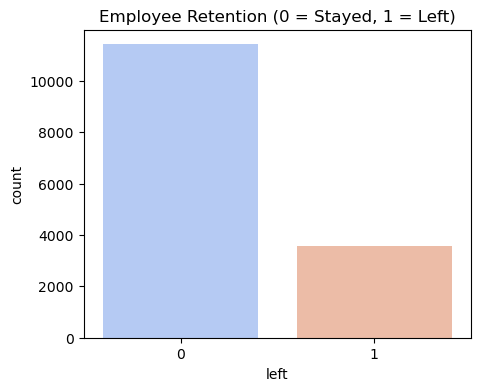

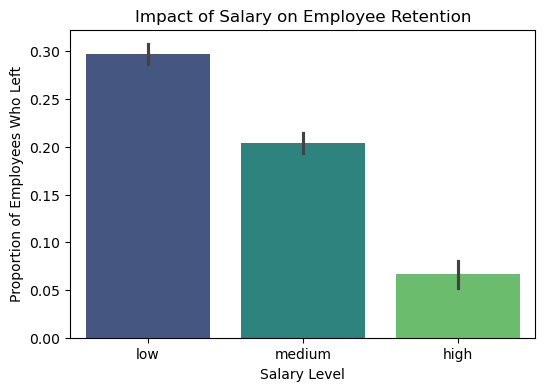

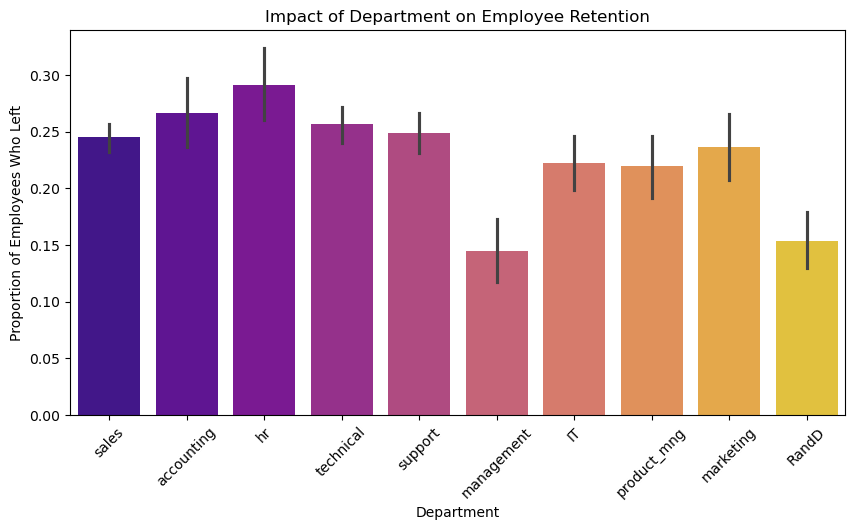

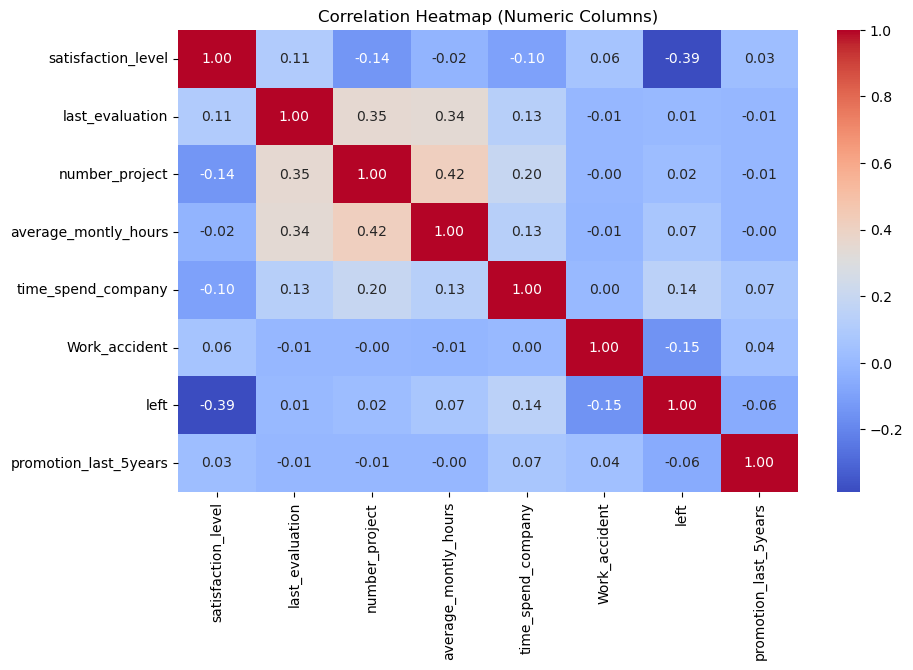


Encoded Feature Columns:
Index(['satisfaction_level', 'average_montly_hours', 'promotion_last_5years',
       'salary_low', 'salary_medium'],
      dtype='object')

Training samples: 11999
Testing samples: 3000

✅ Model Accuracy: 76.20%


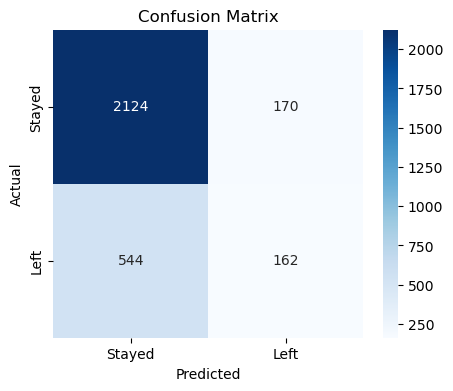


Classification Report:
               precision    recall  f1-score   support

      Stayed       0.80      0.93      0.86      2294
        Left       0.49      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000


Example Prediction:  Will Stay


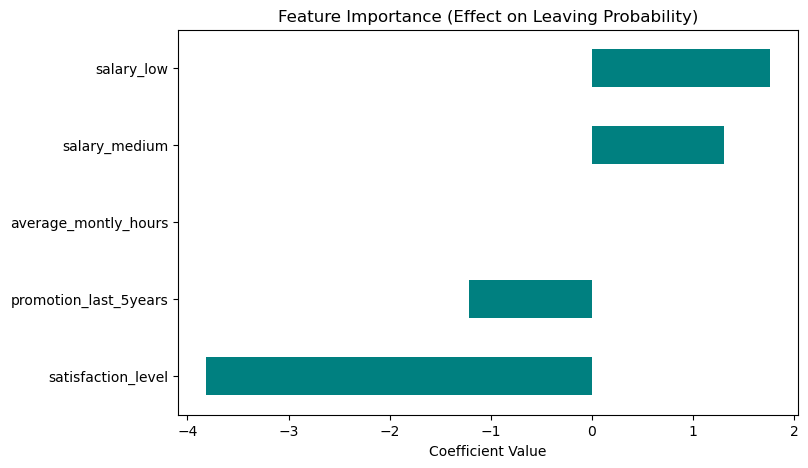

In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "1"   # avoid MKL multi-thread warnings on Windows

import warnings
warnings.filterwarnings("ignore")




# ==============================================
# Logistic Regression – Employee Retention (HR Analytics)
# ==============================================

# ---------------------------
# Step 1: Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Step 2: Load Dataset
# ---------------------------
# Path to your downloaded dataset
dataset_path = r"C:\Users\lenovo\.cache\kagglehub\datasets\giripujar\hr-analytics\versions\1\HR_comma_sep.csv"
df = pd.read_csv(dataset_path)

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())

# ---------------------------
# Step 3: Data Cleaning
# ---------------------------
# Rename columns if needed (optional, for readability)
df.rename(columns={'sales': 'Department'}, inplace=True)

print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# ---------------------------
# Step 4: Exploratory Data Analysis (EDA)
# ---------------------------

# (A) Check employee retention distribution
plt.figure(figsize=(5,4))
sns.countplot(x='left', data=df, palette='coolwarm')
plt.title("Employee Retention (0 = Stayed, 1 = Left)")
plt.show()

# (B) Impact of Salary on Employee Retention
plt.figure(figsize=(6,4))
sns.barplot(x='salary', y='left', data=df, palette='viridis')
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

# (C) Impact of Department on Employee Retention
plt.figure(figsize=(10,5))
sns.barplot(x='Department', y='left', data=df, palette='plasma')
plt.xticks(rotation=45)
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

# (D) Correlation Heatmap – Only Numeric Columns
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])  # exclude strings like 'Department' & 'salary'
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

# Observations (based on typical results):
# - satisfaction_level is strongly negatively correlated with leaving.
# - average_montly_hours has mild positive correlation.
# - last_evaluation and promotion_last_5years also show weak relationships.

# ---------------------------
# Step 5: Feature Selection
# ---------------------------
# Select variables that impact retention based on EDA
# satisfaction_level, average_montly_hours, promotion_last_5years, salary
features = ['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']

X = df[features]
y = df['left']

# Encode categorical variable 'salary' using one-hot encoding
X = pd.get_dummies(X, columns=['salary'], drop_first=True)

print("\nEncoded Feature Columns:")
print(X.columns)

# ---------------------------
# Step 6: Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# ---------------------------
# Step 7: Train Logistic Regression Model
# ---------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ---------------------------
# Step 8: Model Evaluation
# ---------------------------
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Model Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stayed', 'Left'], 
            yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

# ---------------------------
# Step 9: Example Prediction
# ---------------------------
# Predict whether an employee with certain characteristics is likely to leave
sample = pd.DataFrame({
    'satisfaction_level': [0.75],
    'average_montly_hours': [160],
    'promotion_last_5years': [0],
    'salary_low': [0],
    'salary_medium': [1]
})
prediction = model.predict(sample)[0]
print("\nExample Prediction: ", "Will Leave" if prediction == 1 else "Will Stay")

# ---------------------------
# Step 10: Feature Importance Visualization
# ---------------------------
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importance (Effect on Leaving Probability)")
plt.xlabel("Coefficient Value")
plt.show()
